# System Required;

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/portuguese-bank-marketing-dataset/Portuguese Banking-full Dataset.csv
/kaggle/input/portuguese-bank-marketing-dataset/bank-additional/bank-additional-names.txt
/kaggle/input/portuguese-bank-marketing-dataset/bank-additional/bank-additional-full.csv


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_regression, SelectKBest

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2

from sklearn.metrics import classification_report, confusion_matrix

Collaboration Team Members & Work Credit;
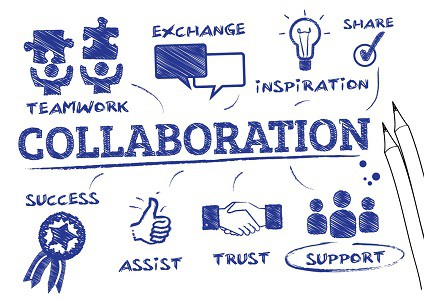
-> https://www.linkedin.com/in/dicky-aryanto-3317b222b/?original_referer=

# **0. Create an Function**

## **0.1. To put a comma on 3 numbers**

In [5]:
def coma(value):
    str_value = str(value)
    separate_decimal = str_value.split(".")
    after_decimal = separate_decimal[0]
    before_decimal = separate_decimal[1]

    reverse = after_decimal[::-1]
    temp_reverse_value = ""

    for index, val in enumerate(reverse):
        if (index + 1) % 3 == 0 and index + 1 != len(reverse):
            temp_reverse_value = temp_reverse_value + val + "."
        else:
            temp_reverse_value = temp_reverse_value + val

    temp_result = temp_reverse_value[::-1]

    return temp_result

## **0.2. Numerical currency function to Rupiah**

In [6]:
def rupiah(value):
    str_value = str(value)
    separate_decimal = str_value.split(".")
    after_decimal = separate_decimal[0]
    before_decimal = separate_decimal[1]

    reverse = after_decimal[::-1]
    temp_reverse_value = ""

    for index, val in enumerate(reverse):
        if (index + 1) % 3 == 0 and index + 1 != len(reverse):
            temp_reverse_value = temp_reverse_value + val + "."
        else:
            temp_reverse_value = temp_reverse_value + val

    temp_result = temp_reverse_value[::-1]

    return "Rp " + temp_result + "," + before_decimal

## **0.3. The function sets the 16:9 visualization size**

In [7]:
def wide(lebar):
    tinggi = (lebar/16) * 9
    return tinggi

## **0.4. Time Transform Data Function**

In [8]:
def transform_time(data):
    data['Tahun'] = pd.to_datetime(data.Tanggal).dt.year
    data['No_Bulan'] = pd.to_datetime(data.Tanggal).dt.month
    data['Bulan'] = pd.to_datetime(data.Tanggal).dt.month_name()
    data['Week'] = pd.to_datetime(data.Tanggal).dt.week
    data['Week'] = data.Week.apply(lambda x: week_transform(x))
    data['Tgl'] = pd.to_datetime(data.Tanggal).dt.day
    data['Hari'] = pd.to_datetime(data.Tanggal).dt.day_name()
    data['Hari'] = data.Hari.apply(lambda x: hari(x))
    data['Hour'] = pd.to_datetime(data.Tanggal).dt.hour
    data['Nomor'] = 1
    return data

# **1. Read & Cleaning Data**

In [9]:
df = pd.read_csv('/kaggle/input/portuguese-bank-marketing-dataset/bank-additional/bank-additional-full.csv', delimiter=';')
# df = pd.read_csv('./Data/bank-marketing-data.csv', delimiter=';')

In [10]:
df = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
         'pdays', 'poutcome', 'y']]

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'pdays', 'poutcome',
       'y'],
      dtype='object')

In [12]:
df['duration'] = df.duration/60

# **2. Exploratory Data Analyst (EDA)**

**Facts About Crew Marketing Experience**
1. From the data provider's statement, they say that the longer **Prospective Client** talks to **Crew Marketing**, the higher the chance that **Prospective Client** will subscribe.

**Research purposes**
1. We will determine what influences make the opportunity for **Prospective Client** to subscribe to a promotional offer by **Crew Marketing**

## **2.0. Check from the total trial offer what percentage is subscribed and how many are not?**

In [13]:
eda0 = df
eda0['number'] = 1

In [14]:
eda0 = eda0.groupby(['y'])[['number']].sum().reset_index()

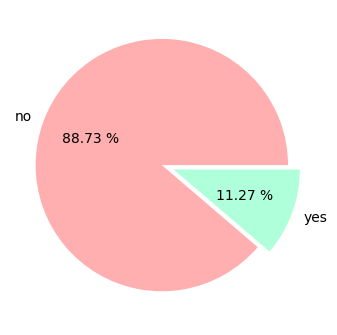

In [15]:
uk =3.5
plt.figure(figsize=(uk, uk))
plt.pie(eda0.number, explode=[0.05, 0.05], autopct='%.2f %%', labels=eda0.y.tolist(), colors=['#FFAFAF', '#AFFFDB'])

plt.tight_layout()
plt.show()

## **2.1. Check Is It True That The Effect of Talking Duration Has a Positive Impact**

In [16]:
contact = df
contact.reset_index(drop=True, inplace=True)

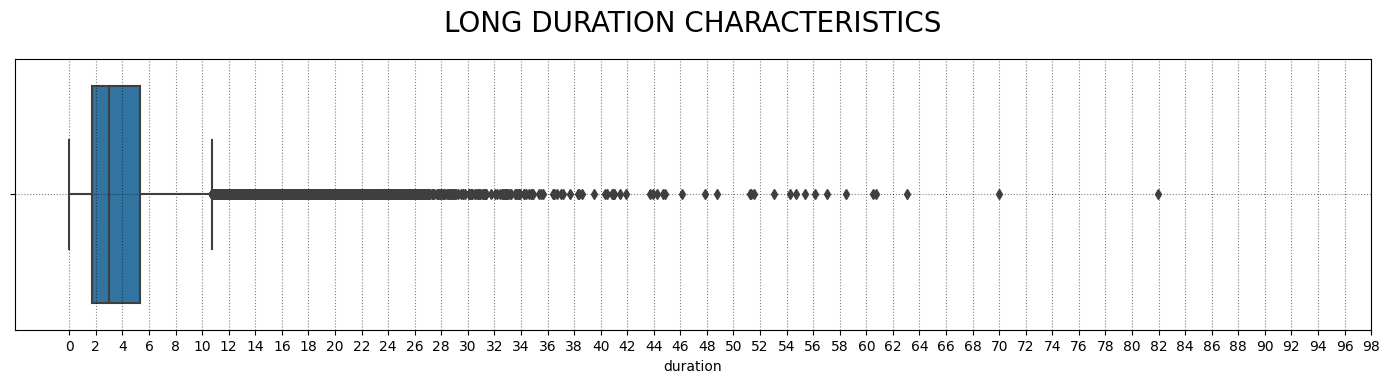

In [17]:
width=14
plt.figure(figsize=(width, wide(width)/2))
plt.title('LONG DURATION CHARACTERISTICS', fontsize=20, pad=20)
sns.boxplot(contact, x='duration')

plt.xticks(np.arange(0, 100,2))
plt.grid(linestyle=':', color='black', alpha=0.5)

plt.tight_layout()
plt.show()

From the boxplot above, we now understand that out of 1,515 telephone conversations between **Marketing Crew** and **Prospective Client**, most of the call duration was between **2 minutes - 7 minutes**

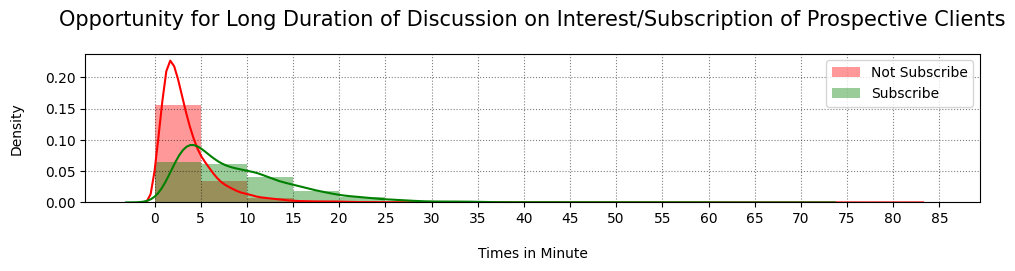

In [18]:
width=10
plt.figure(figsize=(width, wide(width)/2))
plt.title('Opportunity for Long Duration of Discussion on Interest/Subscription of Prospective Clients', fontsize=15, pad=20)
sns.distplot(contact.duration[contact.y == 'no'], bins=np.arange(0, 90, 5), color='r', label='Not Subscribe')
sns.distplot(contact.duration[contact.y == 'yes'], bins=np.arange(0, 90, 5), color='green', label='Subscribe')

plt.legend()
plt.xticks(np.arange(0, 90, 5))
plt.xlabel('Times in Minute', labelpad=15)
plt.ylabel('Density', labelpad=15)


plt.grid(linestyle=':', color='black', alpha=0.5)

plt.tight_layout()
plt.show()

**INSIGHT :**
1. Pada grafik peluang diatas, terlihat bahwa **Calon Client** yang berbincang dengan durasi yang **Lama** pasti akan berlangganan.
2. Pada durasi yang **Normal : 0 - 5 menit**, peluang **Calon Client** tertarik/berlangganan lebih tinggi dari yang tidak tertarik. 

In [19]:
# According to chatGPT, the normal time to talk about promotions is 10 - 15 minutes.
# then I make a grouping as follows.

def duration_status(x):
    if x < 5:
        return 0
    elif x >= 5 and x <= 15:
        return 1
    else:
        return 2
    
contact['duration_class'] = contact.duration.apply(lambda x: duration_status(x))

In [20]:
contact1 = []

for x in contact.duration_class.unique().tolist():
    n = contact[contact.duration_class == x]
    
    percent_yes = np.round(((n[n.y == 'yes'].y.count())/len(n))*100, 2)
    percent_no = np.round(((n[n.y == 'no'].y.count())/len(n))*100, 2)
    
    result = pd.DataFrame({
        'percent':[percent_no, percent_yes],
        'y':['no', 'yes']
    })
    
    result['duration_class'] = x
    contact1.append(result)
    
contact1 = pd.concat(contact1, axis=0)

In [21]:
contact2 = contact.groupby(['duration_class', 'y'])[['y']].count()
contact2.columns = ['Banyak Transaksi']

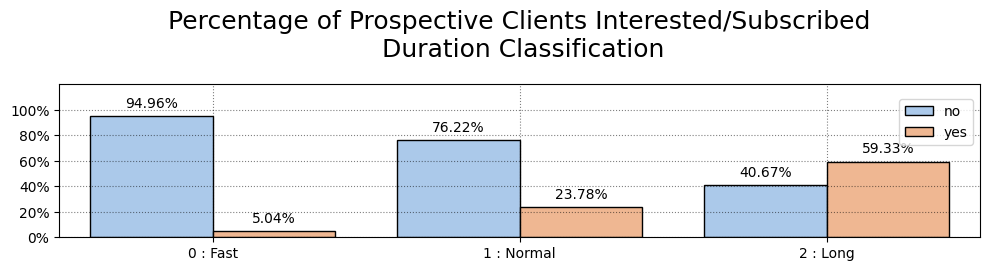

Banyak Transaksi
duration_class y                    
0              no              28429
               yes              1509
1              no               7598
               yes              2371
2              no                521
               yes               760

In [22]:
plt.figure(figsize=(width, wide(width)/2))
plt.title('Percentage of Prospective Clients Interested/Subscribed\n Duration Classification', fontsize=18, pad=20)
splot = sns.barplot(contact1, x='duration_class', y='percent', hue='y', edgecolor='black', palette='pastel')

for g in splot.patches:
    height = g.get_height()
    get_x = g.get_x()
    get_width = g.get_width()
    
    if height != 0:
        splot.annotate(format(height) + '%', (get_x + get_width/2, height), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    else:
        None

plt.grid(linestyle=':', color='black', alpha=0.5)
plt.xlabel('')
plt.xticks(np.arange(0,3), ['0 : Fast', '1 : Normal', '2 : Long'])
plt.ylabel('')
plt.yticks(np.arange(0, 101, 20), ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.ylim(ymin=0, ymax=120)
plt.legend(bbox_to_anchor=(1, 0.95))

plt.tight_layout()
plt.show()

contact2

#### **CONCLUSION :**

1. Based on the data, it is true that the longer the duration, the greater the chance that **Prospective Client** will be interested/subscribe to the program offered
2. There were only **53 Prospective Clients** who spoke with duration in the **Old** category, and there were **12 Clients** who eventually did not subscribe and there were **41 Clients** who subscribed.

**QUESTION :**
1. What is the background of the **12 Clients** who are relatively old in transactions but don't subscribe?

In [23]:
contact4 = contact[(contact.duration_class == 2) & (contact.y == 'no')]

In [24]:
contact5 = contact4.groupby(['education'])[['education']].count()
contact5.columns = ['Banyak']
contact5.sort_values('Banyak', ascending=True, inplace=True)
contact5.reset_index(inplace=True)

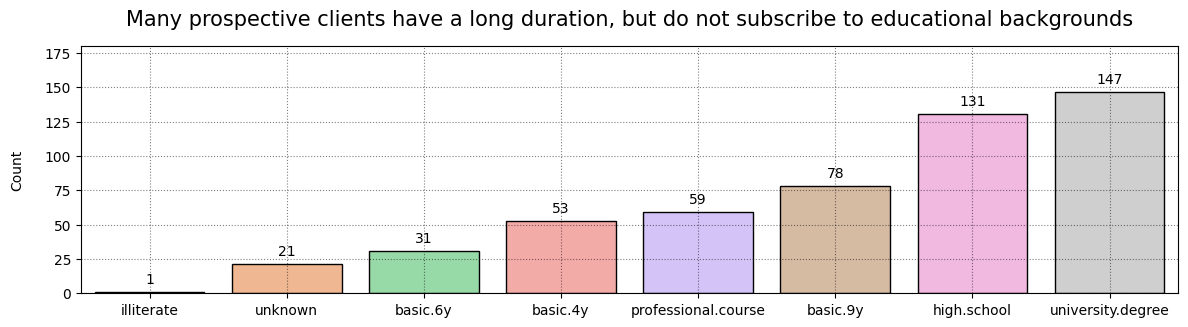

In [25]:
width=12
plt.figure(figsize=(width, wide(width)/2))
plt.title('Many prospective clients have a long duration, but do not subscribe to educational backgrounds', fontsize=15, pad=15)
splot = sns.barplot(contact5, x='education', y='Banyak', palette='pastel', edgecolor='black')

for g in splot.patches:
    height = g.get_height()
    get_x = g.get_x()
    get_width = g.get_width()
    
    if height != 0:
        splot.annotate(coma(format(height)), (get_x + get_width/2, height), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    else:
        None

plt.ylabel('Count', labelpad=15)
plt.xlabel('')

plt.ylim(ymin=0, ymax=180)
plt.grid(linestyle=':', color='black', alpha=0.5)

plt.tight_layout()
plt.show()

From the barplot above, it can be seen that **university.degree** educational background is the most talked about duration which is in the long category but does not subscribe. Allow this to happen because their curiosity is high but not to subscribe.

## **2.2. Check the Influence Other than Length of Duration on the High and Low Opportunities of Prospective Clients in Subscribing**

In [26]:
df['duration_class'] = df.duration.apply(lambda x: duration_status(x))

### **2.2.1. Does the previous outcome affect the chances of subscribing to the next offer?**

In [27]:
eda1 = df[['poutcome', 'y']]
eda1['Number'] = 1

eda1 = eda1.groupby(['poutcome', 'y'])[['Number']].sum().reset_index()

eda2 = []
for x in eda1.poutcome.unique().tolist():
    n = eda1[eda1.poutcome == x]
    total = n.Number.sum()
    value = []
    for a in eda1.y.unique():
        m = n[n.y == a]
        percent = (m.Number.tolist()[0]/total)*100
        percent = np.round(percent, 2)
        value1 = pd.DataFrame({'poutcome':[x], 'y':[a], 'Count':[m.Number.tolist()[0]], 'Percent_Number':[percent]})
        value.append(value1)
    value = pd.concat(value, axis=0)
    eda2.append(value)

eda2 = pd.concat(eda2, axis=0)

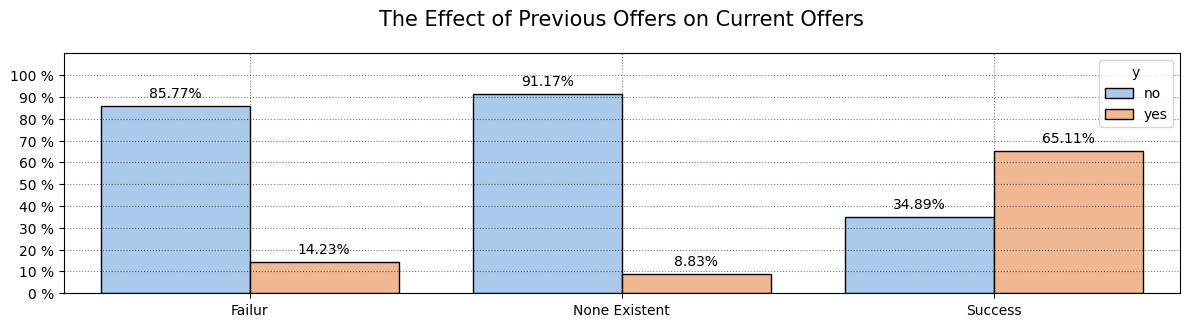

Count
poutcome    y         
failure     no    3647
            yes    605
nonexistent no   32422
            yes   3141
success     no     479
            yes    894

In [28]:
plt.figure(figsize=(width, wide(width)/2))
plt.title('The Effect of Previous Offers on Current Offers', fontsize=15, pad=20)
splot = sns.barplot(eda2, x='poutcome', y='Percent_Number', hue='y', edgecolor='black', palette='pastel')

for g in splot.patches:
    height = g.get_height()
    get_x = g.get_x()
    get_width = g.get_width()
    
    if height != 0:
        splot.annotate(format(height) + '%', (get_x + get_width/2, height), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    else:
        None

plt.ylabel('')
plt.yticks(np.arange(0, 101, 10), [str(x) + ' %' for x in range(0, 101, 10)])

plt.grid(linestyle=':', color='black', alpha=0.5)
plt.ylim(ymin=0, ymax=110)

plt.xlabel('')
plt.xticks(np.arange(0, 3), ['Failur', 'None Existent', 'Success'])

plt.tight_layout()
plt.show()

eda2 = eda2[['poutcome', 'y', 'Count']].set_index(['poutcome', 'y'])
eda2

**INSIGHTS :**

1. There are still higher chances when **Clients** who previously wanted to join our program for the next offer also want to join.
2. It's more difficult when you want to find a new **Client** compared to the previous **Client** that we have offered but failed and continue to be offered in the next period to subscribe.

### **2.2.2. In what age range have a high chance of subscribing?**

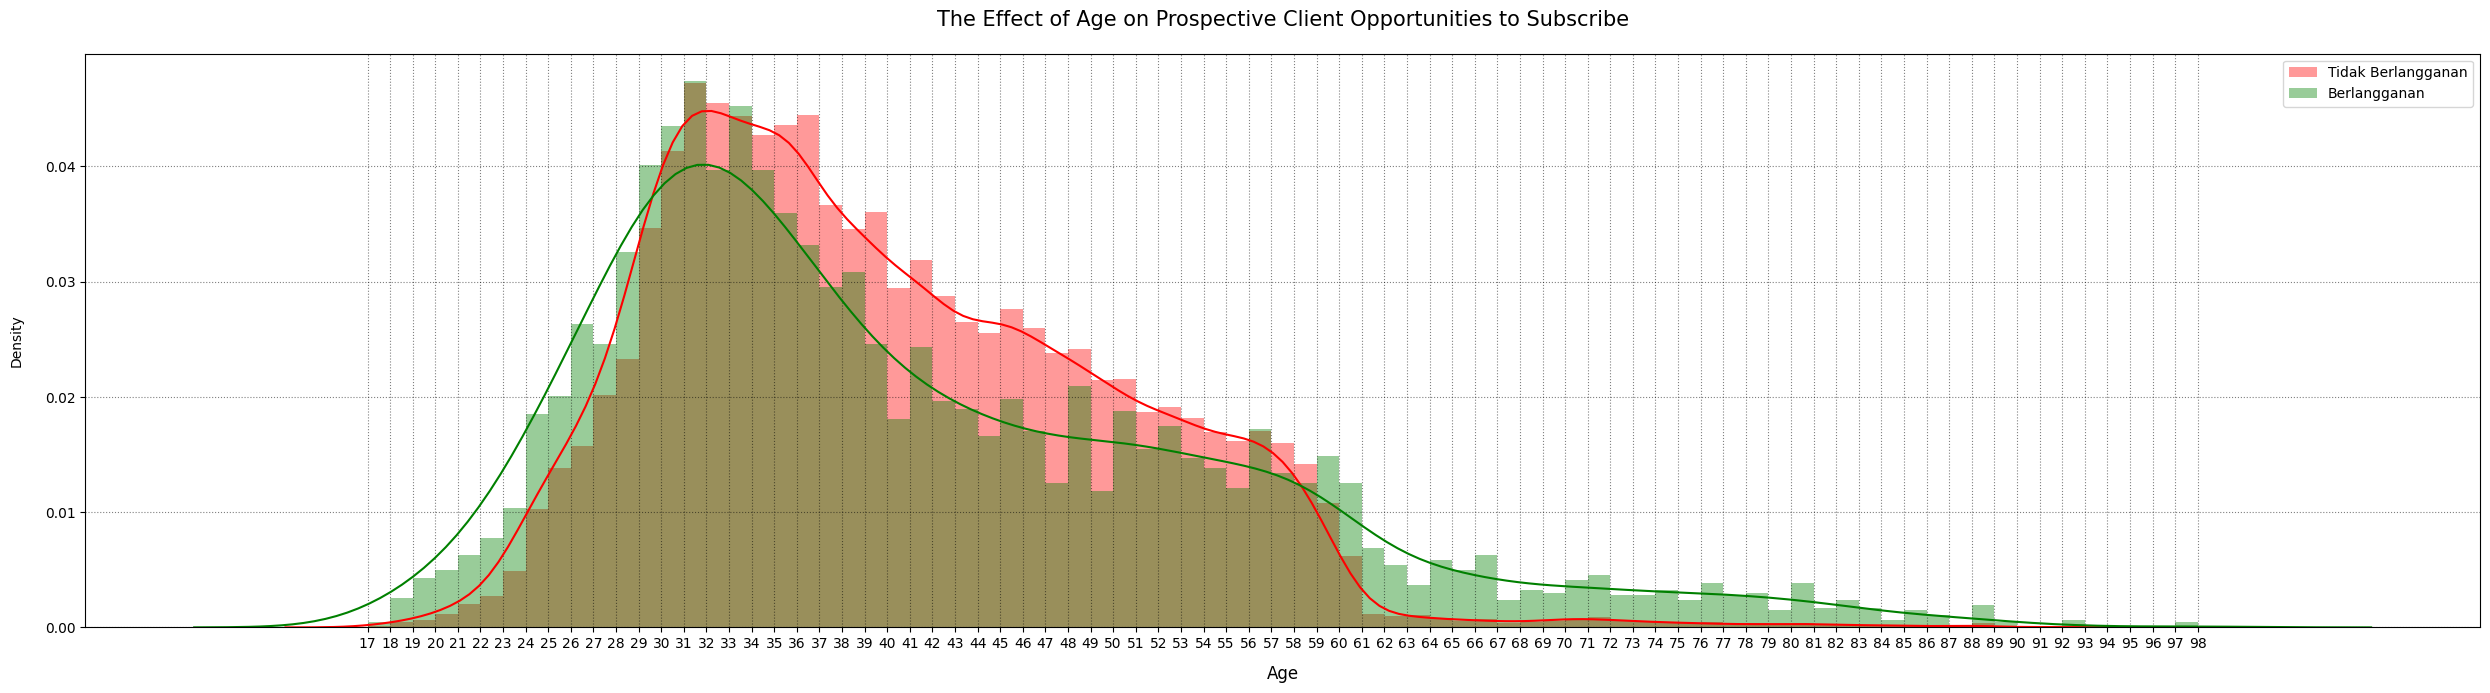

In [29]:
width=25
plt.figure(figsize=(width, wide(width)/2))
plt.title('The Effect of Age on Prospective Client Opportunities to Subscribe', fontsize=15, pad=20)
sns.distplot(df.age[df.y == 'no'], bins=np.arange(df.age.min(), df.age.max() + 1), color='r', label='Tidak Berlangganan')
sns.distplot(df.age[df.y == 'yes'], bins=np.arange(df.age.min(), df.age.max() + 1), color='green', label='Berlangganan')

plt.legend()
plt.xticks(np.arange(df.age.min(), df.age.max() + 1))
plt.xlabel('Age', fontsize=12, labelpad=10)
plt.ylabel('Density', labelpad=15)


plt.grid(linestyle=':', color='black', alpha=0.5)

plt.tight_layout()
plt.show()

In [30]:
def class_age(x):
    if x >= 17 and x <= 31:
        return 'Rekomendation'
    if x >= 59:
        return 'Rekomendation'
    if x >= 32 and x <= 58:
        return 'Unrecomendation'

In [31]:
eda2 = df

eda2['age_class'] = eda2.age.apply(lambda x: class_age(x))

eda2_1 = []

for x in eda2.age_class.unique().tolist():
    n = eda2[eda2.age_class == x][['y', 'age_class']]
    
    total = len(n)
    yes = len(n[n.y == 'yes'])
    yes_percent = np.round((yes/total)*100)
    
    no = len(n[n.y == 'no'])
    no_percent = np.round((no/total)*100)
    
    value = pd.DataFrame({'percent':[yes_percent, no_percent], 'count':[yes, no], 'y':['yes', 'no']})
    value['age_class'] = x
    value['banding'] = np.round(value.percent/value.percent.min())
    value = value[['age_class', 'y', 'percent', 'banding', 'count']]
    eda2_1.append(value)
    break
    
    
eda2 = pd.concat(eda2_1, axis=0)
eda2

,age_class,y,percent,banding,count
0,Unrecomendation,yes,9.0,1.0,2755
1,Unrecomendation,no,91.0,10.0,27447


**INSIGHTS :**

1. The target of **Crew Marketing** according to the graph is in the age range **17 - 31** and **59 - 97**.
2. It can be seen from the graph that many offers were made in the age range **32 - 58** which should have been dismissed/anticipated earlier because they have a high chance of not accepting the program offer.

**EXPLAIN :**
1. In the age range it is not recommended, it only has a chance percentage of **YES : 9%** and **NO : 91%**, or for simplicity we can say it is close to **1 : 10**. In the trial of **100 Offers** at a non-recommended age, it is possible that **10 Prospective Clients** accept and the remaining **90 Prospective Clients** reject the offer.

### **2.2.3. The effect of work background on the probability of a prospective client subscribing**

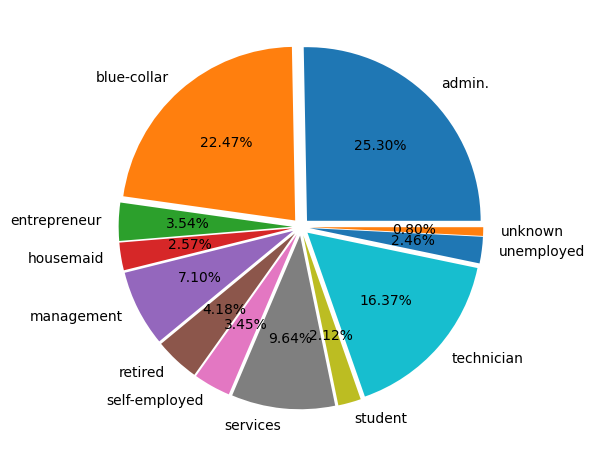

In [32]:
eda3 = df
eda3['number'] = 1
eda3 = eda3.groupby(['job'])[['number']].sum().reset_index()

size=6
plt.figure(figsize=(size, size))
plt.pie(eda3.number, explode=[0.05 for x in range(len(eda3))], autopct='%.2f%%', labels=eda3.job.tolist())

plt.tight_layout()
plt.show()

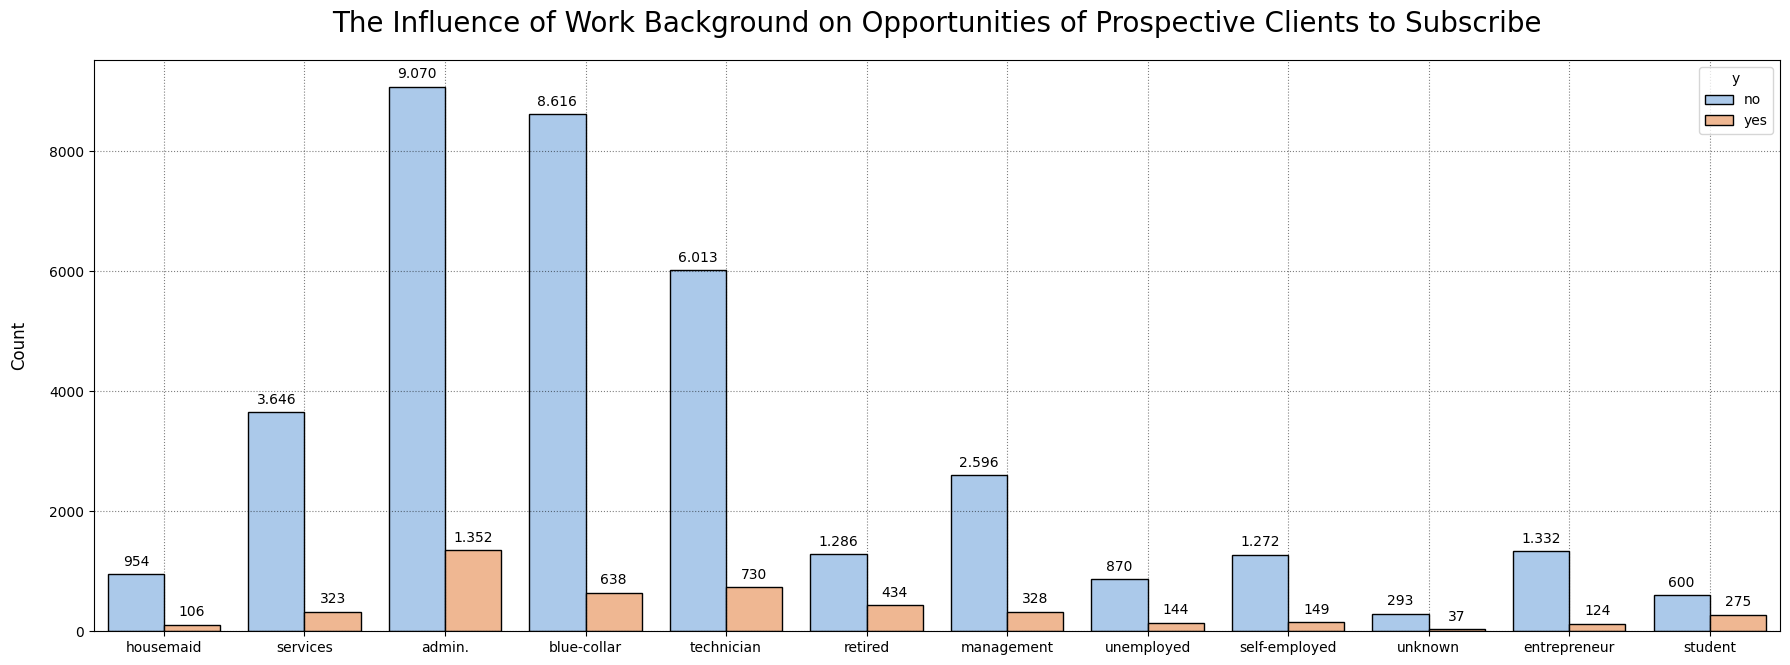

In [33]:
width=18
plt.figure(figsize=(width, wide(width)/1.5))
plt.title('The Influence of Work Background on Opportunities of Prospective Clients to Subscribe', fontsize=20, pad=20)
splot = sns.countplot(df, x='job', hue='y', palette='pastel', edgecolor='black')

for g in splot.patches:
    height = g.get_height()
    get_x = g.get_x()
    get_width = g.get_width()
    
    if height != 0:
        splot.annotate(rupiah(format(height)).split()[-1].split(',')[0], (get_x + get_width/2, height), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    else:
        None

plt.ylabel('Count', fontsize=12, labelpad=15)
plt.xlabel('')


plt.grid(linestyle=':', color='black', alpha=0.5)

plt.tight_layout()
plt.show()

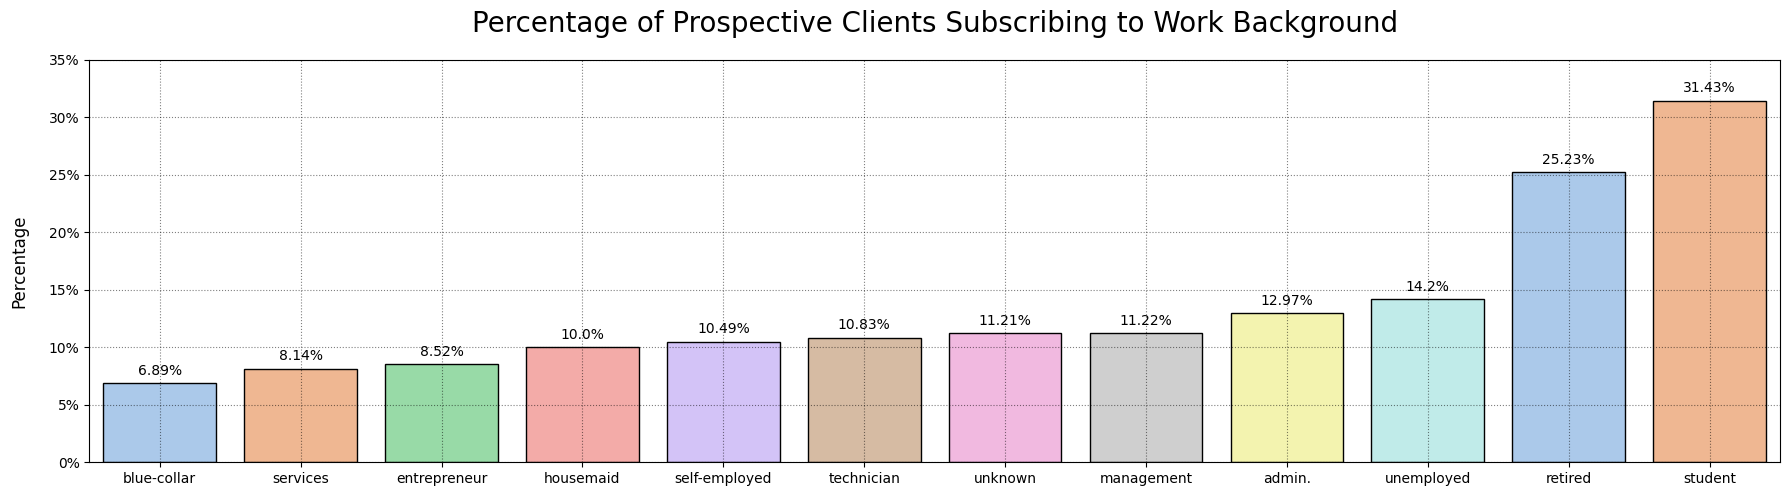

In [34]:
eda3 = df[['job', 'y']]

eda3_1 = []

for x in eda3.job.unique().tolist():
    n = eda3[eda3.job == x]
    
    tot = len(n)
    yes = len(n[n.y == 'yes'])
    no = len(n[n.y == 'no'])
        
    percent_yes = np.round((yes/tot)*100, 2)
    percent_no = np.round((no/tot)*100, 2)
    
    value = pd.DataFrame({'y':['no', 'yes'], 'count':[no, yes], 'percent_count':[percent_no, percent_yes]})
    value['job'] = x
    value = value[['job', 'y', 'count', 'percent_count']]
    eda3_1.append(value)
    
eda3 = pd.concat(eda3_1, axis=0)

plt.figure(figsize=(width, wide(width)/2))
plt.title('Percentage of Prospective Clients Subscribing to Work Background', fontsize=20, pad=20)
splot=sns.barplot(eda3[eda3.y == 'yes'].sort_values('percent_count', ascending=True), x='job', y='percent_count', edgecolor='black', palette='pastel')

for g in splot.patches:
    height = g.get_height()
    get_x = g.get_x()
    get_width = g.get_width()
    
    if height != 0:
        splot.annotate(format(height) + '%', (get_x + get_width/2, height), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    else:
        None

plt.xlabel('')
plt.ylabel('Percentage', fontsize=12, labelpad=15)
plt.yticks(np.arange(0, 36, 5), [str(x) + '%' for x in range(0, 36, 5)])
plt.grid(linestyle=':', color='black', alpha=0.5)

plt.tight_layout()
plt.show()

**INSIGHTS :**

1. I think that **Crew Marketing** gives more efort to **Prospective Clients** who have a small percentage of subscriptions to the offer. Meanwhile **Prospective Clients** who are given a lot of great effort but have a small percentage of subscriptions are as follows.
     - admin : **12.97%** who received from **10422**
     - blue-collar : **6.89%** who received from **9254**
     - technician : **10.83%** who received from **6742**
2. **student** and **retired** work backgrounds have a percentage of **> 25%**. The details are as follows.
     - student : **31.43%** who received from **875**
     - retired : **25.23%** who received from **1720**

**EXPLAIN :**
1. Suppose that more effort is given to the right target, namely with a work background: **student/retired**, then:
     - if **student** : 10422 * (31.43%) = 3276 **Prospective Client** who subscribe.
     - if **retired** : 10422 * (25.23%) = 2629 **Prospective Client** who subscribe.

### **2.2.4. The influence of marital background on the probability of a prospective client subscribing**

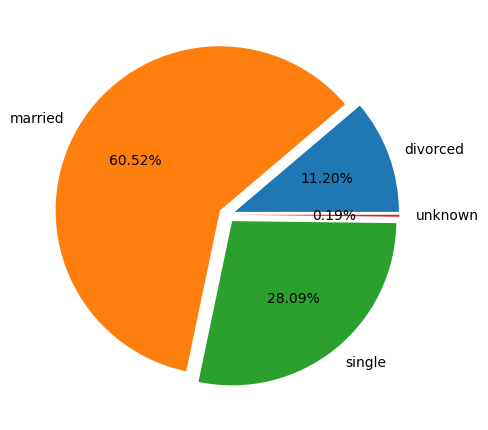

In [35]:
eda4 = df

eda4['number'] = 1
eda4 = eda4.groupby(['marital'])[['number']].sum().reset_index()

size=5
plt.figure(figsize=(size, size))
plt.pie(eda4.number, explode=[0.05 for x in range(len(eda4))], autopct='%.2f%%', labels=eda4.marital.tolist())

plt.tight_layout()
plt.show()

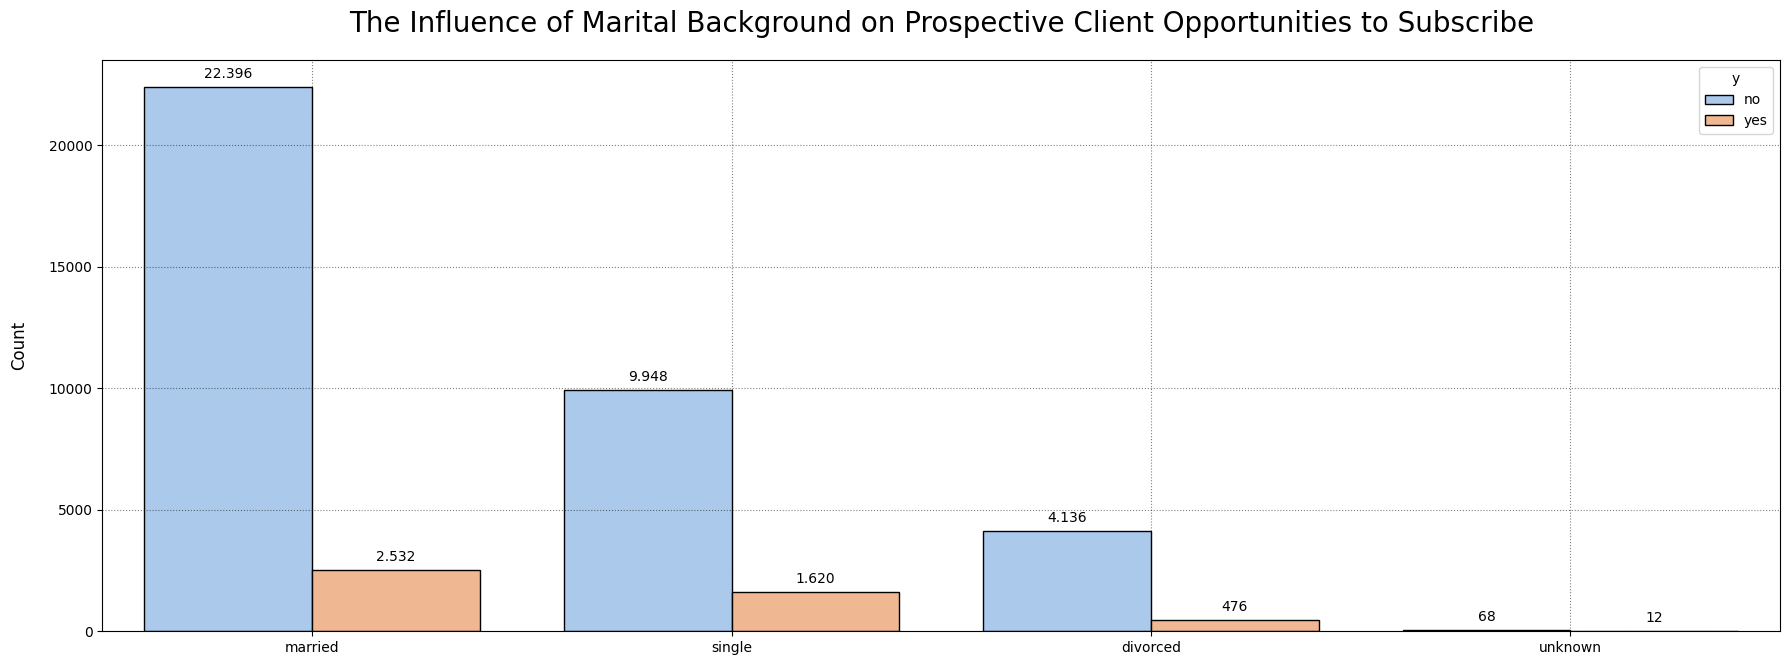

In [36]:
width=18
plt.figure(figsize=(width, wide(width)/1.5))
plt.title('The Influence of Marital Background on Prospective Client Opportunities to Subscribe', fontsize=20, pad=20)
splot = sns.countplot(df, x='marital', hue='y', palette='pastel', edgecolor='black')

for g in splot.patches:
    height = g.get_height()
    get_x = g.get_x()
    get_width = g.get_width()
    
    if height != 0:
        splot.annotate(rupiah(format(height)).split()[-1].split(',')[0], (get_x + get_width/2, height), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    else:
        None

plt.ylabel('Count', fontsize=12, labelpad=15)
plt.xlabel('')


plt.grid(linestyle=':', color='black', alpha=0.5)

plt.tight_layout()
plt.show()

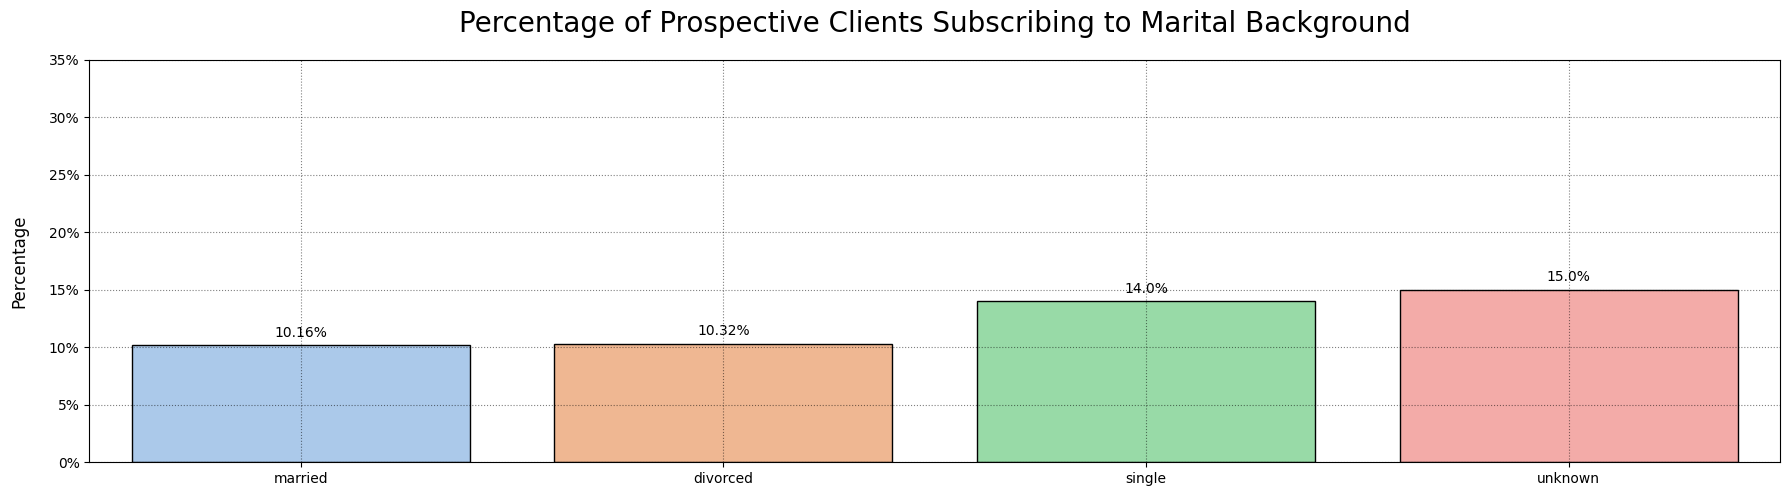

In [37]:
eda4 = df[['marital', 'y']]

eda4_1 = []

for x in eda4.marital.unique().tolist():
    n = eda4[eda4.marital == x]
    
    tot = len(n)
    yes = len(n[n.y == 'yes'])
    no = len(n[n.y == 'no'])
        
    percent_yes = np.round((yes/tot)*100, 2)
    percent_no = np.round((no/tot)*100, 2)
    
    value = pd.DataFrame({'y':['no', 'yes'], 'count':[no, yes], 'percent_count':[percent_no, percent_yes]})
    value['marital'] = x
    value = value[['marital', 'y', 'count', 'percent_count']]
    eda4_1.append(value)
    
eda4 = pd.concat(eda4_1, axis=0)

plt.figure(figsize=(width, wide(width)/2))
plt.title('Percentage of Prospective Clients Subscribing to Marital Background', fontsize=20, pad=20)
splot=sns.barplot(eda4[eda4.y == 'yes'].sort_values('percent_count', ascending=True), x='marital', y='percent_count', edgecolor='black', palette='pastel')

for g in splot.patches:
    height = g.get_height()
    get_x = g.get_x()
    get_width = g.get_width()
    
    if height != 0:
        splot.annotate(format(height) + '%', (get_x + get_width/2, height), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    else:
        None

plt.xlabel('')
plt.ylabel('Percentage', fontsize=12, labelpad=15)
plt.yticks(np.arange(0, 36, 5), [str(x) + '%' for x in range(0, 36, 5)])
plt.grid(linestyle=':', color='black', alpha=0.5)

plt.tight_layout()
plt.show()

**INSIGHTS :**

1. 60.5% of the data, **Crew Marketing** tries to contact **Prospective Client** with married status. however, according to the results of the data summary, those who are married have a small percentage of those who want to subscribe. Conversely, those who are not married have a higher subscription percentage but are not given more efort.

**EXPLAIN :**
1. If a lot of efort is aimed at **Prospective Client** with **single** status, then the possibility will be as follows.
     - 24928 * 14% = 2490 Prospective Clients obtained

### **2.2.5. The influence of educational background on the opportunities for prospective client to subscribe**

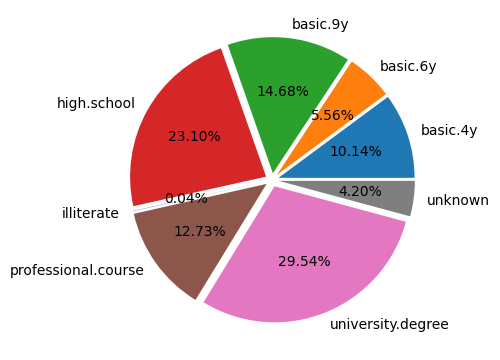

In [38]:
eda5 = df

eda5['number'] = 1
eda5 = eda5.groupby(['education'])[['number']].sum().reset_index()

size=5
plt.figure(figsize=(size, size))
plt.pie(eda5.number, explode=[0.05 for x in range(len(eda5))], autopct='%.2f%%', labels=eda5.education.tolist())

plt.tight_layout()
plt.show()

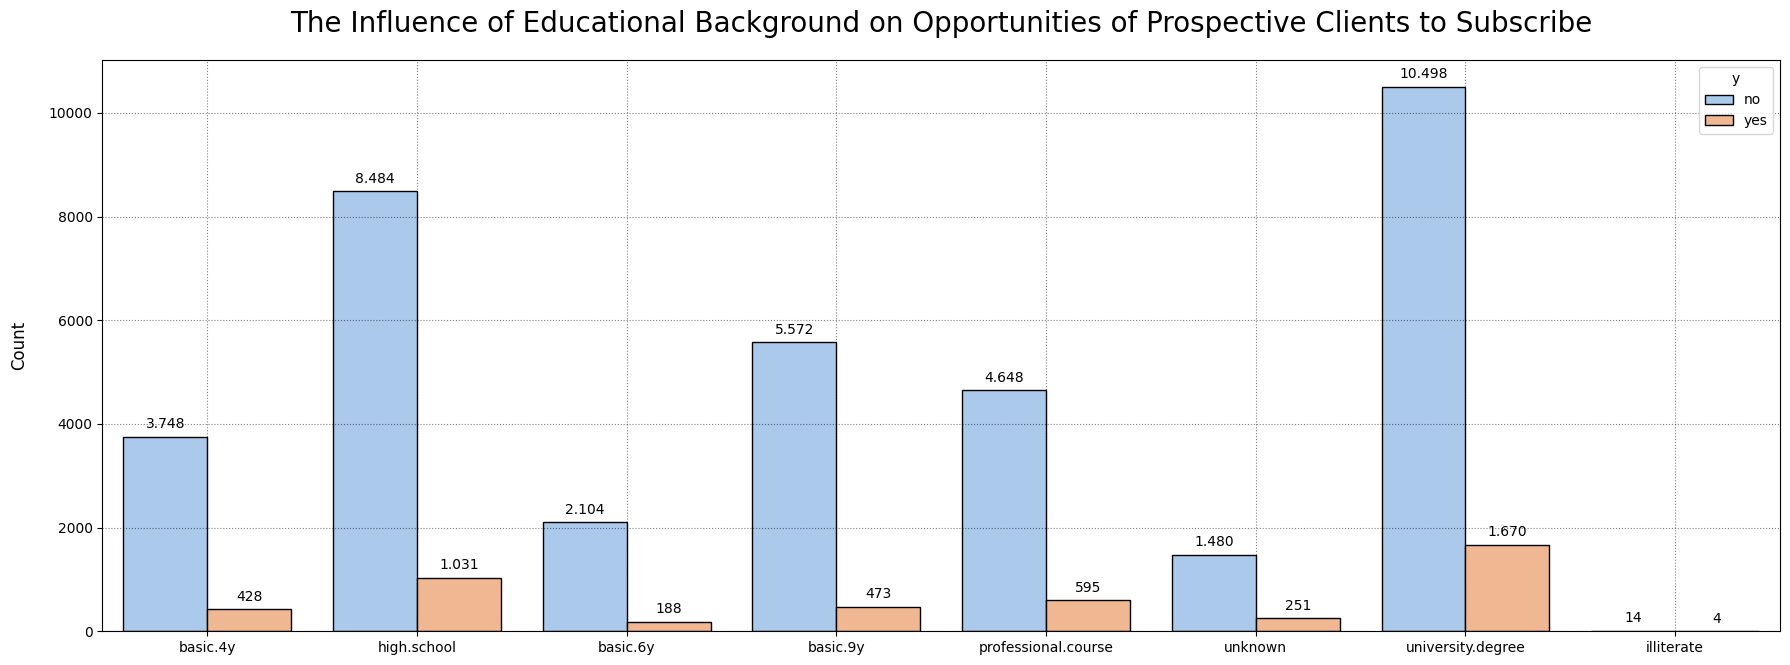

In [39]:
width=18
plt.figure(figsize=(width, wide(width)/1.5))
plt.title('The Influence of Educational Background on Opportunities of Prospective Clients to Subscribe', fontsize=20, pad=20)
splot = sns.countplot(df, x='education', hue='y', palette='pastel', edgecolor='black')

for g in splot.patches:
    height = g.get_height()
    get_x = g.get_x()
    get_width = g.get_width()
    
    if height != 0:
        splot.annotate(rupiah(format(height)).split()[-1].split(',')[0], (get_x + get_width/2, height), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    else:
        None

plt.ylabel('Count', fontsize=12, labelpad=15)
plt.xlabel('')


plt.grid(linestyle=':', color='black', alpha=0.5)

plt.tight_layout()
plt.show()

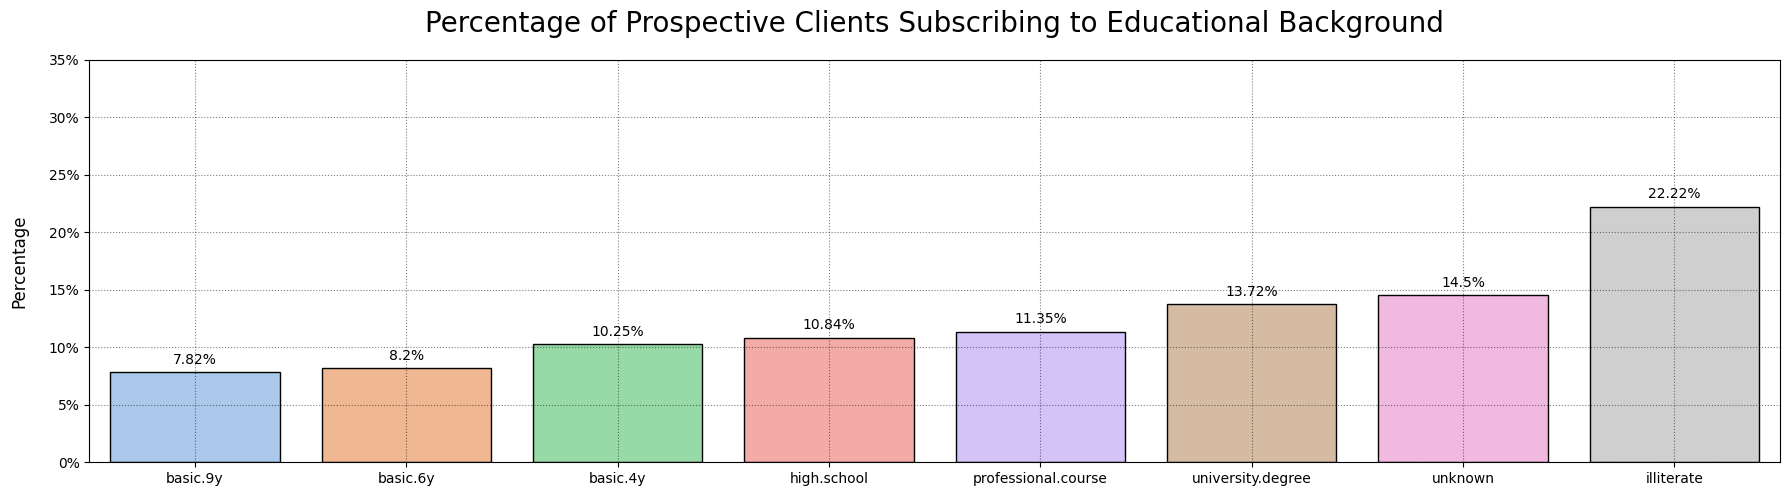

In [40]:
eda5 = df[['education', 'y']]

eda5_1 = []

for x in eda5.education.unique().tolist():
    n = eda5[eda5.education == x]
    
    tot = len(n)
    yes = len(n[n.y == 'yes'])
    no = len(n[n.y == 'no'])
        
    percent_yes = np.round((yes/tot)*100, 2)
    percent_no = np.round((no/tot)*100, 2)
    
    value = pd.DataFrame({'y':['no', 'yes'], 'count':[no, yes], 'percent_count':[percent_no, percent_yes]})
    value['education'] = x
    value = value[['education', 'y', 'count', 'percent_count']]
    eda5_1.append(value)
    
eda5 = pd.concat(eda5_1, axis=0)

plt.figure(figsize=(width, wide(width)/2))
plt.title('Percentage of Prospective Clients Subscribing to Educational Background', fontsize=20, pad=20)
splot=sns.barplot(eda5[eda5.y == 'yes'].sort_values('percent_count', ascending=True), x='education', y='percent_count', edgecolor='black', palette='pastel')

for g in splot.patches:
    height = g.get_height()
    get_x = g.get_x()
    get_width = g.get_width()
    
    if height != 0:
        splot.annotate(format(height) + '%', (get_x + get_width/2, height), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    else:
        None

plt.xlabel('')
plt.ylabel('Percentage', fontsize=12, labelpad=15)
plt.yticks(np.arange(0, 36, 5), [str(x) + '%' for x in range(0, 36, 5)])
plt.grid(linestyle=':', color='black', alpha=0.5)

plt.tight_layout()
plt.show()

**INSIGHTS :**

1. 60.5% of the data, **Crew Marketing** tries to contact **Prospective Client** with married status. however, according to the results of the data summary, those who are married have a small percentage of those who want to subscribe. Conversely, those who are not married have a higher subscription percentage but are not given more efort.

**EXPLAIN :**
1. If a lot of efort is aimed at **Prospective Client** with **single** status, then the possibility will be as follows.
     - 24928 * 14% = 2490 Prospective Clients obtained

## **3. Feature Selection**

## **3.0.1. Categorical to Categorical**
Using **Chi Square**

In [41]:
# Choose a categorical data and append to df_cat
df_cat = df[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','age_class','duration_class','y']]

# Encoder Categorical Data
LE = LabelEncoder()

for x in df_cat.columns:
    df_cat[x] = LE.fit_transform(df_cat[x])

In [42]:
# split data feature as X and data target as y
X = df_cat.drop(columns='y')
y = df_cat['y']

# using Chi Square ~ Chi2 to know an important feature to target
chi_scores = chi2(X, y)

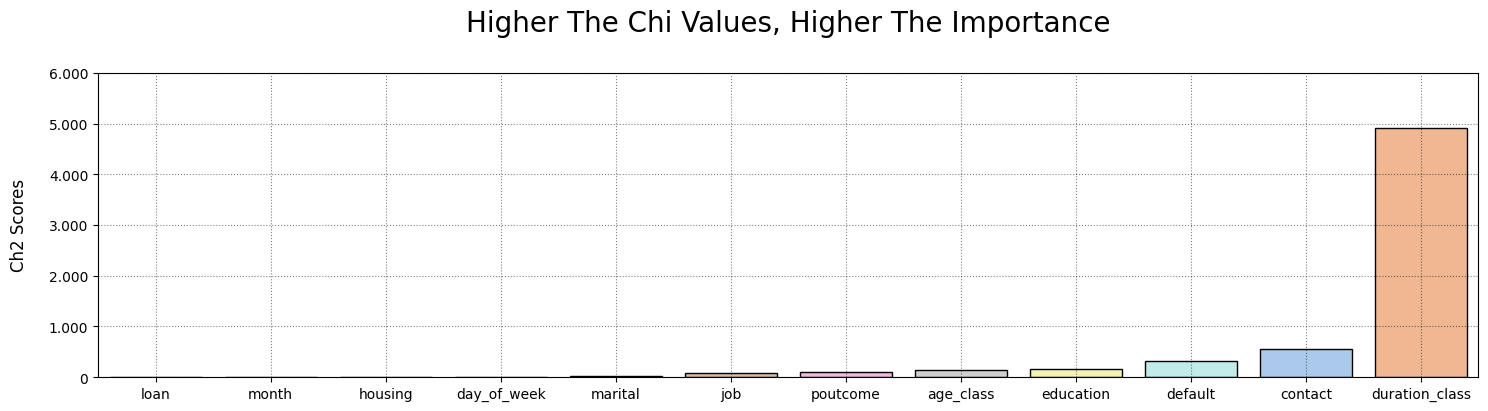

In [43]:
# Higher the chi value, higher is the importance
chi_values = pd.DataFrame({'Variabels':X.columns.tolist(), 'Chi2 Scores':chi_scores[0]})
chi_values.sort_values('Chi2 Scores', ascending=True, inplace=True)

width=15
plt.figure(figsize=(width, wide(width)/2))
plt.title('Higher The Chi Values, Higher The Importance', fontsize=20, pad=30)
sns.barplot(chi_values, x='Variabels', y='Chi2 Scores', linewidth=1, edgecolor='black', palette='pastel')

plt.xlabel('')
plt.grid(linestyle=':', color='black', alpha=0.5)
plt.ylabel('Ch2 Scores', fontsize=12, labelpad=15)
label, location = plt.yticks()
plt.yticks(label, [coma(x) for x in label])

plt.tight_layout()
plt.show()

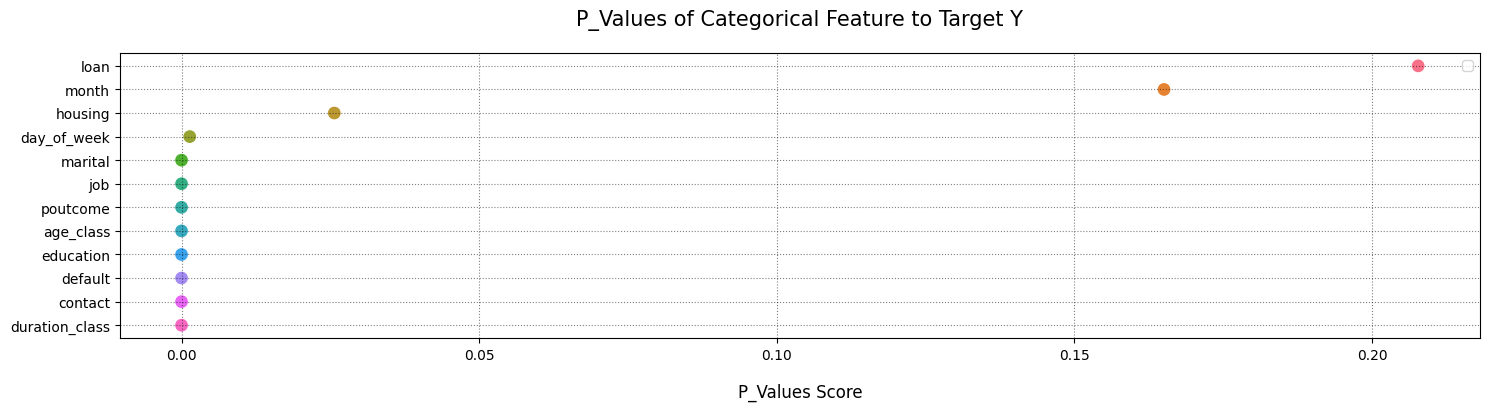

In [44]:
# If P-Value > 0.5, Lower Importance
chi_values = pd.DataFrame({'Variabels':X.columns.tolist(), 'P-Values':chi_scores[1]})
chi_values.sort_values('P-Values', ascending=False, inplace=True)

width=15
plt.figure(figsize=(width, wide(width)/2))
plt.title('P_Values of Categorical Feature to Target Y', fontsize=15, pad=20)
sns.scatterplot(chi_values, y='Variabels', x='P-Values', s=100, hue='Variabels')
plt.grid(linestyle=':', color='black', alpha=0.5)
plt.xlabel('P_Values Score', fontsize=12, labelpad=15)
plt.legend('')
plt.ylabel('')

plt.tight_layout()
plt.show()

**INSIGHTS :**

1. From the above observations, we know how influential duration_cast is on our prediction target. duration_class have a higher chi2 and the lower p-value score.
2. Next, we can consider still including the loan and the months variabel as features to improve prediction accuracy.

**What Next ?**
1. Before we use all the features column which is below 0.05 p-value, we need to check its correctness.


## **3.0.2. Continue to continue**
Using **LDA : Linear Discriminant Analysis**

In [45]:
# create an dataframe with numerical feature
df_num = df[['age', 'duration', 'y']]

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)

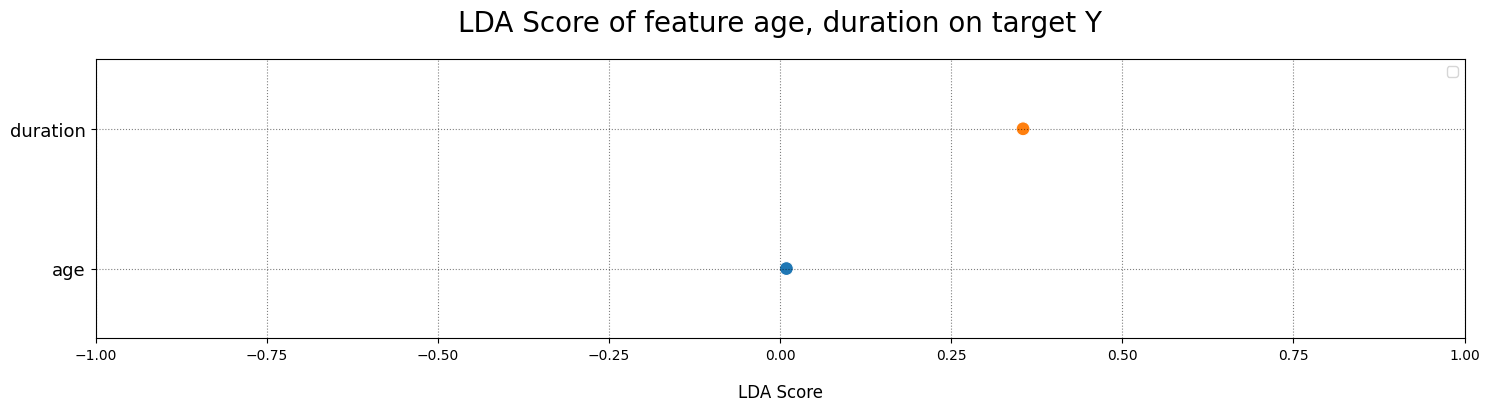

In [46]:
lda_report = []
for x in ['age','duration']:
    feature = df_num[x].values.reshape(-1, 1)
    target = df_num['y'].values.reshape(-1, 1)
    lda.fit_transform(feature, target)
    lda_score = lda.coef_[0][0]
    report = pd.DataFrame({
        'Feature':[x],
        'LDA Score':[lda_score]
    })
    
    lda_report.append(report)
    
lda_report = pd.concat(lda_report, axis=0)
lda_report.reset_index(drop=True, inplace=True)

# visualize LDA Score
width=15
plt.figure(figsize=(width, wide(width)/2))
plt.title('LDA Score of feature age, duration on target Y', fontsize=20, pad=20)
sns.scatterplot(lda_report, y='Feature', x='LDA Score', s=100, hue='Feature')
plt.grid(linestyle=':', color='black', alpha=0.5)
plt.xlim(xmin=-1, xmax=1)
plt.ylim(ymin=-0.5, ymax=1.5)
plt.xlabel('LDA Score', fontsize=12, labelpad=15)
plt.yticks(fontsize=13)
plt.legend('')
plt.ylabel('')

plt.tight_layout()
plt.show()

The two features ['age', 'duration'] have a positive LDA score, so this condition indicates that the two features are related to the prediction target. Although the LDA score of the 'age' feature is very small.The two features ['age', 'duration'] have a positive LDA score, so this condition indicates that the two features are related to the prediction target. Although the LDA score of the 'age' feature is very small.

# **4. Feature Enginering**

In [47]:
# create a list of rekomendation categorical feature
feature_categorical_rekomended = chi_values[chi_values['P-Values'] < 0.05].Variabels.unique().tolist()

In [48]:
# create an data using feature_categorical rekomendation
df_use = pd.concat([df[feature_categorical_rekomended], df[['y']]], axis=1)
df_use['duration'] = df['duration']

In [49]:
# # coba menggunakan KModes
# X = df
# X['age_bins'] = pd.cut(df['age'], bins=np.arange(0, 110, 20), labels=[str(x) + '-' + str(x+20) for x in range(0, 100, 20)])
# X = X[['job', 'marital', 'education', 'housing', 'loan', 'age_bins']]

# # preprocessing data
# X_modes = X.apply(LE.fit_transform)

# # gunakan Kmodes untuk clustering jenis-jenis data
# from kmodes.kmodes import KModes

# kmodes = KModes(n_clusters=10, init='Cao')
# clusters = kmodes.fit_predict(X_modes)

# X['kmodes'] = clusters
# X['y'] = df['y']
# df_use['kmodes'] = clusters

# **5. Preprocessing**

In [50]:
# get an 1000 rows of data. thats to ballancing data target
df_yes = df_use[df_use.y=='yes'].head(1000)
df_no = df_use[df_use.y=='no'].head(1000)
df_use = pd.concat([df_yes, df_no], axis=0)

# resample data
df_use = df_use.sample(frac=1).reset_index(drop=True)

# split data feature and target
x = df_use.drop(columns='y')
y = df_use[['y']]

# split data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

# look for a dimension of data we have
print(f'1. x_train shape : {x_train.shape}')
print(f'2. y_train shape : {y_train.shape}')
print(f'3. x_test shape  : {x_test.shape}')
print(f'4. y_test shape  : {y_test.shape}')

1. x_train shape : (1600, 11)
2. y_train shape : (1600, 1)
3. x_test shape  : (400, 11)
4. y_test shape  : (400, 1)


# **6. Model : RandomForestClassifier**

In [51]:
# create numeric pipeline
num_pipeline = Pipeline([
    ('scaling', MinMaxScaler())
])

# create numeric pipeline
cate_pipeline = Pipeline([
    ('encoder', OneHotEncoder(categories='auto', sparse=False))
])

# create processor columns transformer
processor = ColumnTransformer([
    ('numerical', num_pipeline, ['duration']),
    ('categorical', cate_pipeline, df_use.drop(columns=['y', 'duration']).columns.tolist())
])

# create proces & metods/algoritm pipeline
pipeline = Pipeline([
    ('proces', processor),
    ('algo', RandomForestClassifier())
])

rf_params = {
    'algo__n_estimators': [200],
    'algo__max_depth': [55],
    'algo__min_samples_leaf': [5]
}

# create model using best params
model = GridSearchCV(pipeline, rf_params)
model.fit(x_train, y_train)

print('1. Best Parameter :', model.best_params_)
print('2. Best Score     :', np.round(model.best_score_, 3))
print('3. Train Score    :', np.round(model.score(x_train, y_train), 3))
print('4. Test Score     :', np.round(model.score(x_test, y_test), 3))

1. Best Parameter : {'algo__max_depth': 55, 'algo__min_samples_leaf': 5, 'algo__n_estimators': 200}
2. Best Score     : 0.945
3. Train Score    : 0.961
4. Test Score     : 0.932


# **7. Report : Classification Report and Confusion Matrix**

In [52]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

cr_train = classification_report(y_train, train_pred)
cr_test = classification_report(y_test, test_pred)

cm_train = confusion_matrix(y_train, train_pred)
cm_test = confusion_matrix(y_test, test_pred)

In [53]:
print('1. TRAIN CLASSIFICATION REPORT : \n')
print(cr_train)
print('\n\n2. TEST CLASSIFICATION REPORT : \n')
print(cr_test)

1. TRAIN CLASSIFICATION REPORT : 

              precision    recall  f1-score   support

          no       0.97      0.95      0.96       804
         yes       0.95      0.97      0.96       796

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



2. TEST CLASSIFICATION REPORT : 

              precision    recall  f1-score   support

          no       0.96      0.90      0.93       196
         yes       0.91      0.97      0.94       204

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



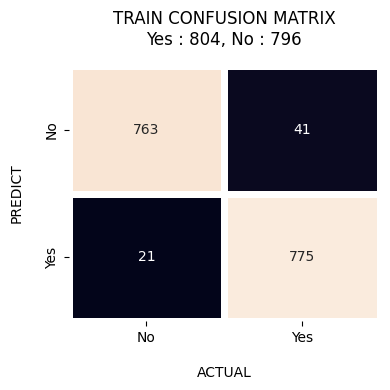

In [54]:
# Visualize Train Confusion Matrix
plt.figure(figsize=(4,4))
plt.title('TRAIN CONFUSION MATRIX\nYes : %i, No : %i'%(y_train.y.value_counts().tolist()[0]
                                                      ,y_train.y.value_counts().tolist()[1]), pad=15)
sns.heatmap(cm_train, annot=True, fmt="", linewidths=5, cbar=False)
plt.xticks([0.5, 1.5], ["No", "Yes"])
plt.xlabel('ACTUAL', fontsize=10, labelpad=15)
plt.yticks([0.5, 1.5], ["No", "Yes"])
plt.ylabel('PREDICT', fontsize=10, labelpad=15)

plt.tight_layout()
plt.show()

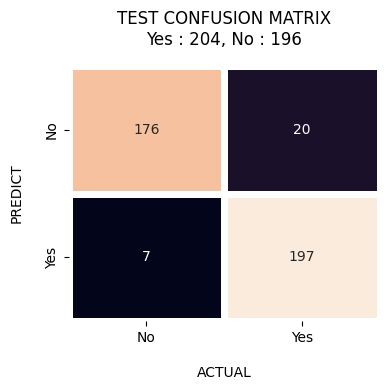

In [55]:
# Visualize Test Confusion Matrix
plt.figure(figsize=(4,4))
plt.title('TEST CONFUSION MATRIX\nYes : %i, No : %i'%(y_test.y.value_counts().tolist()[0]
                                                      ,y_test.y.value_counts().tolist()[1]), pad=15)
sns.heatmap(cm_test, annot=True, fmt="", linewidths=5, cbar=False)
plt.xticks([0.5, 1.5], ["No", "Yes"])
plt.xlabel('ACTUAL', fontsize=10, labelpad=15)
plt.yticks([0.5, 1.5], ["No", "Yes"])
plt.ylabel('PREDICT', fontsize=10, labelpad=15)

plt.tight_layout()
plt.show()

In [56]:
#